In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import AgglomerativeClustering
import networkx as nx
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
import matplotlib.patches as patches
from sklearn.preprocessing import StandardScaler
import matplotlib.lines as mlines
from sklearn.ensemble import IsolationForest
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA

## Preprocessing

In [3]:
raw_data = pd.read_csv(r"C:\Users\Jackgloves\Desktop\QF 632\Project\An_Cov.csv")

In [4]:
raw_data

,ANALYST,DATE,BROKER,RATING,RECOMMENDATION,TARGET_PRICE,BBTICKER,GICS_SECTOR_NAME,GICS_INDUSTRY_GROUP_NAME
0,Jamrgett,3/5/2020,Beerg,5.0,buy,1.220000e+02,NESN SW Equity,Consumer Staples,"Food, Beverage & Tobacco"
1,Joneeney,3/3/2020,Corch,3.0,equalweight,1.050000e+02,NESN SW Equity,Consumer Staples,"Food, Beverage & Tobacco"
2,MarDeboo,3/2/2020,Jeies,3.0,hold,1.050000e+02,NESN SW Equity,Consumer Staples,"Food, Beverage & Tobacco"
3,Niclberg,3/1/2020,Lirum,3.0,hold,1.070000e+02,NESN SW Equity,Consumer Staples,"Food, Beverage & Tobacco"
4,Antpagna,2/27/2020,ISEVA,5.0,overweight,-2.420000e-14,NESN SW Equity,Consumer Staples,"Food, Beverage & Tobacco"
...,...,...,...,...,...,...,...,...,...
8671,Inghmidt,4/7/2016,Hasse,1.0,sell,-2.420000e-14,LHA GR Equity,Industrials,Transportation
8672,Xavaroen,3/9/2018,Br Co,3.0,neutral,8.800000e+01,BMW3 GR Equity,Consumer Discretionary,Automobiles & Components
8673,FraMaury,4/4/2016,OdBHF,2.0,reduce,8.900000e+01,BMW3 GR Equity,Consumer Discretionary,Automobiles & Components
8674,RenWeber,2/4/2020,Ba AG,3.0,hold,5.000000e+01,UHRN SW Equity,Consumer Discretionary,Consumer Durables & Apparel


In [5]:
raw_data.columns

Index(['ANALYST', 'DATE', 'BROKER', 'RATING', 'RECOMMENDATION', 'TARGET_PRICE',
       'BBTICKER', 'GICS_SECTOR_NAME', 'GICS_INDUSTRY_GROUP_NAME'],
      dtype='object')

### Dealing with missing values and duplicated values

In [6]:
raw_data.isnull().any()

ANALYST                     False
DATE                        False
BROKER                      False
RATING                       True
RECOMMENDATION              False
TARGET_PRICE                False
BBTICKER                    False
GICS_SECTOR_NAME            False
GICS_INDUSTRY_GROUP_NAME    False
dtype: bool

In [7]:
raw_data_cleaned = raw_data.drop_duplicates(subset=['ANALYST', 'BBTICKER']).dropna()

In [8]:
raw_data_cleaned.isnull().any()

ANALYST                     False
DATE                        False
BROKER                      False
RATING                      False
RECOMMENDATION              False
TARGET_PRICE                False
BBTICKER                    False
GICS_SECTOR_NAME            False
GICS_INDUSTRY_GROUP_NAME    False
dtype: bool

### Question 1: Which company has the higher analyst coverage? (Look at histogram)

In [9]:
raw_data_cleaned.columns

Index(['ANALYST', 'DATE', 'BROKER', 'RATING', 'RECOMMENDATION', 'TARGET_PRICE',
       'BBTICKER', 'GICS_SECTOR_NAME', 'GICS_INDUSTRY_GROUP_NAME'],
      dtype='object')

In [10]:
raw_data_cleaned["ANALYST"].value_counts()

Antpagna    206
Valtaldy    162
Teaerage     39
Svemeier     38
Casy Lea     36
           ... 
Madgaard      1
Rob Rane      1
Oliebing      1
Cararnes      1
Xavaroen      1
Name: ANALYST, Length: 2025, dtype: int64

In [11]:
raw_data_cleaned['BBTICKER'].value_counts()

ADS GR Equity      44
SAP GR Equity      42
ASML NA Equity     41
EQNR NO Equity     37
ABI BB Equity      36
                   ..
HEIO NA Equity      5
RYAAY US Equity     4
RO SW Equity        3
BMW3 GR Equity      2
UHRN SW Equity      2
Name: BBTICKER, Length: 360, dtype: int64

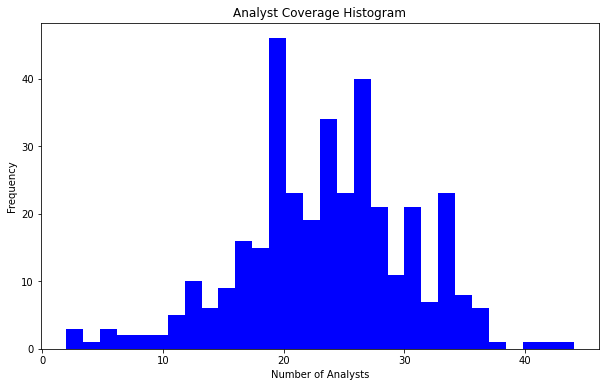

In [12]:
# Group the data by "BBTICKER" and count the number of unique analysts
coverage = raw_data_cleaned.groupby('BBTICKER')['ANALYST'].nunique()

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(coverage, bins=30, color='blue')
plt.title('Analyst Coverage Histogram')
plt.xlabel('Number of Analysts')
plt.ylabel('Frequency')
plt.show()

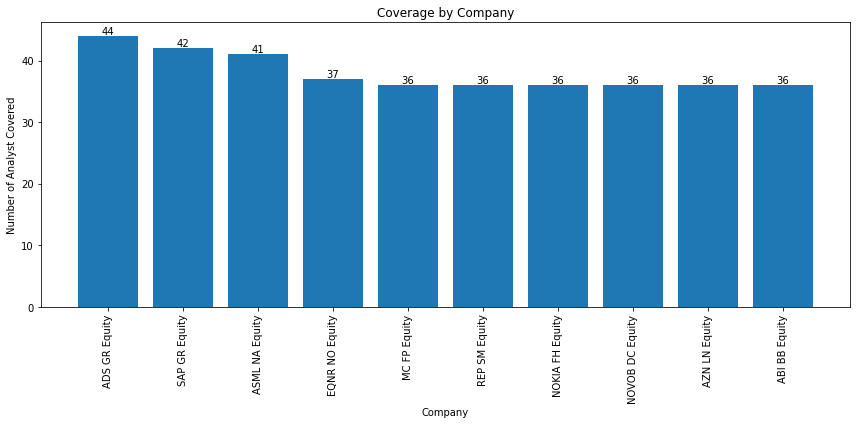

In [13]:
# Plot the bar chart to show highest coverage analyst
coverage_sorted = coverage.sort_values(ascending=False)
coverage_sorted_filtered = coverage_sorted[coverage_sorted > 35]

plt.figure(figsize=(12, 6))
plt.bar(coverage_sorted_filtered.index, coverage_sorted_filtered.values)
plt.xticks(rotation=90)
plt.xlabel('Company')
plt.ylabel('Number of Analyst Covered')
plt.title('Coverage by Company')

for i, v in enumerate(coverage_sorted_filtered.values):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [14]:
# Group the data by "BBTICKER" and count the number of unique analysts
coverage = raw_data_cleaned.groupby('BBTICKER')['ANALYST'].nunique()

# Find the company with the highest analyst coverage
highest_coverage_company = coverage.idxmax()
highest_coverage_value = coverage.max()

# Print the highest coverage company and its number of analysts
print("Company with the highest analyst coverage:")
print("Ticker: ", highest_coverage_company)
print("Number of Analysts: ", highest_coverage_value)

Company with the highest analyst coverage:
Ticker:  ADS GR Equity
Number of Analysts:  44


### Question 2: Which analyst covers the most companies? (Look at histogram)

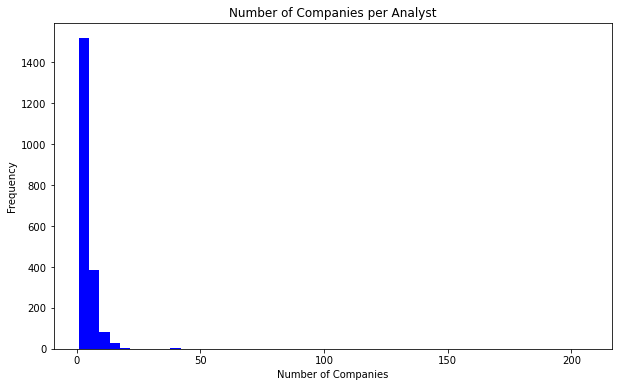

In [15]:
# Group the data by "ANALYST" and count the number of unique companies
coverage = raw_data_cleaned.groupby('ANALYST')['BBTICKER'].nunique()

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(coverage, bins=50, color='blue')
plt.title('Number of Companies per Analyst')
plt.xlabel('Number of Companies')
plt.ylabel('Frequency')
plt.show()

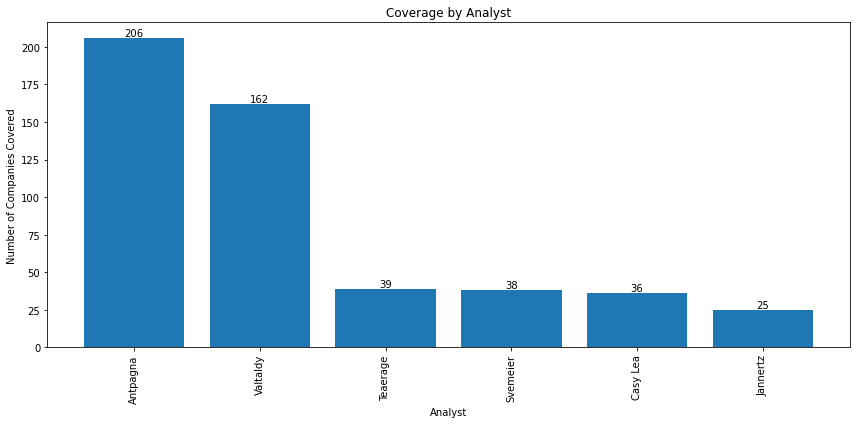

In [16]:
# Plot the bar chart to show highest coverage analyst
coverage_sorted = coverage.sort_values(ascending=False)
coverage_sorted_filtered = coverage_sorted[coverage_sorted > 20]

plt.figure(figsize=(12, 6))
plt.bar(coverage_sorted_filtered.index, coverage_sorted_filtered.values)
plt.xticks(rotation=90)
plt.xlabel('Analyst')
plt.ylabel('Number of Companies Covered')
plt.title('Coverage by Analyst')

for i, v in enumerate(coverage_sorted_filtered.values):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [17]:
# Group the data by "ANALYST" and count the number of unique companies
coverage = raw_data_cleaned.groupby('ANALYST')['BBTICKER'].nunique()

# Find the analyst with the highest coverage
highest_coverage_analyst = coverage.idxmax()
highest_coverage_value = coverage.max()

# Print the analyst with the highest coverage and the number of companies covered
print("Analyst with the highest coverage:")
print("Analyst: ", highest_coverage_analyst)
print("Number of Companies: ", highest_coverage_value)

Analyst with the highest coverage:
Analyst:  Antpagna
Number of Companies:  206


### Question 3.a

In [18]:
# Create a pivot table with analysts as columns and companies as index
pivot_table = pd.pivot_table(raw_data_cleaned, index='BBTICKER', columns='ANALYST', aggfunc=len, fill_value=0)

# Calculate the Jaccard similarity matrix
jaccard_similarity_matrix = np.zeros((pivot_table.shape[0], pivot_table.shape[0]))

for i in range(pivot_table.shape[0]):
    for j in range(i+1, pivot_table.shape[0]):
        intersection = np.sum(np.logical_and(pivot_table.iloc[i] > 0, pivot_table.iloc[j] > 0))
        union = np.sum(np.logical_or(pivot_table.iloc[i] > 0, pivot_table.iloc[j] > 0))
        jaccard_similarity_matrix[i, j] = intersection / union
        jaccard_similarity_matrix[j, i] = jaccard_similarity_matrix[i, j]
        
# Print the shape of the Jaccard similarity matrix
print("Shape of Jaccard Similarity Matrix:", jaccard_similarity_matrix.shape)

# Print the Jaccard similarity matrix
print("Jaccard Similarity Matrix:")
print(jaccard_similarity_matrix)

Shape of Jaccard Similarity Matrix: (360, 360)
Jaccard Similarity Matrix:
[[0.         0.01923077 0.         ... 0.01818182 0.10416667 0.        ]
 [0.01923077 0.         0.03571429 ... 0.01923077 0.         0.01818182]
 [0.         0.03571429 0.         ... 0.01666667 0.         0.01587302]
 ...
 [0.01818182 0.01923077 0.01666667 ... 0.         0.01923077 0.01724138]
 [0.10416667 0.         0.         ... 0.01923077 0.         0.        ]
 [0.         0.01818182 0.01587302 ... 0.01724138 0.         0.        ]]


### Question 3.b

In [19]:
# Calculate the mean and standard deviation of the number of analysts covering a company
coverage_mean = raw_data_cleaned.groupby('BBTICKER')['ANALYST'].nunique().mean()
coverage_std = raw_data_cleaned.groupby('BBTICKER')['ANALYST'].nunique().std()

# Filter the dataset to include only companies within 1s.d. of the mean coverage
filtered_data = raw_data_cleaned.groupby('BBTICKER').filter(lambda x: (x['ANALYST'].nunique() >= coverage_mean - coverage_std) \
                                                           and (x['ANALYST'].nunique() <= coverage_mean + coverage_std))

# Create a pivot table with analysts as columns and companies as index
pivot_table = pd.pivot_table(filtered_data, index='BBTICKER', columns='ANALYST', aggfunc=len, fill_value=0)

# Calculate the Jaccard similarity matrix
jaccard_similarity_matrix = np.zeros((pivot_table.shape[0], pivot_table.shape[0]))

for i in range(pivot_table.shape[0]):
    for j in range(i+1, pivot_table.shape[0]):
        intersection = np.sum(np.logical_and(pivot_table.iloc[i] > 0, pivot_table.iloc[j] > 0))
        union = np.sum(np.logical_or(pivot_table.iloc[i] > 0, pivot_table.iloc[j] > 0))
        jaccard_similarity_matrix[i, j] = intersection / union
        jaccard_similarity_matrix[j, i] = jaccard_similarity_matrix[i, j]
        
# Print the shape of the Jaccard similarity matrix
print("Shape of Jaccard Similarity Matrix:", jaccard_similarity_matrix.shape)

# Print the Jaccard similarity matrix
print("Jaccard Similarity Matrix (Restricted to 1s.d. of Mean Coverage):")
print(jaccard_similarity_matrix)

Shape of Jaccard Similarity Matrix: (252, 252)
Jaccard Similarity Matrix (Restricted to 1s.d. of Mean Coverage):
[[0.         0.01923077 0.01923077 ... 0.02083333 0.01818182 0.10416667]
 [0.01923077 0.         0.02040816 ... 0.         0.01923077 0.        ]
 [0.01923077 0.02040816 0.         ... 0.02222222 0.03921569 0.02040816]
 ...
 [0.02083333 0.         0.02222222 ... 0.         0.02083333 0.02222222]
 [0.01818182 0.01923077 0.03921569 ... 0.02083333 0.         0.01923077]
 [0.10416667 0.         0.02040816 ... 0.02222222 0.01923077 0.        ]]


### Question 3.c

In [20]:
# Apply additional filtering criteria to select companies covered by 35 or more analysts
subset_companies = raw_data_cleaned.groupby('BBTICKER').filter(lambda x: x['ANALYST'].nunique() >= 35)['BBTICKER'].unique()

# Filter the dataset based on the subset of companies
subset_data = raw_data_cleaned[raw_data_cleaned['BBTICKER'].isin(subset_companies)]

# Create a pivot table with analysts as columns and companies as index
pivot_table = pd.pivot_table(subset_data, index='BBTICKER', columns='ANALYST', aggfunc=len, fill_value=0)

# Calculate the Jaccard similarity matrix
jaccard_similarity_matrix = np.zeros((pivot_table.shape[0], pivot_table.shape[0]))

for i in range(pivot_table.shape[0]):
    for j in range(i+1, pivot_table.shape[0]):
        intersection = np.sum(np.logical_and(pivot_table.iloc[i] > 0, pivot_table.iloc[j] > 0))
        union = np.sum(np.logical_or(pivot_table.iloc[i] > 0, pivot_table.iloc[j] > 0))
        jaccard_similarity_matrix[i, j] = intersection / union
        jaccard_similarity_matrix[j, i] = jaccard_similarity_matrix[i, j]
        
# Print the shape of the Jaccard similarity matrix
print("Shape of Jaccard Similarity Matrix:", jaccard_similarity_matrix.shape)

# Print the Jaccard similarity matrix
print("Jaccard Similarity Matrix (Smaller Subset):")
print(jaccard_similarity_matrix)

Shape of Jaccard Similarity Matrix: (18, 18)
Jaccard Similarity Matrix (Smaller Subset):
[[0.         0.05263158 0.02666667 0.01408451 0.109375   0.16393443
  0.01388889 0.01428571 0.02898551 0.05970149 0.09090909 0.16393443
  0.02857143 0.         0.02857143 0.01428571 0.02631579 0.02898551]
 [0.05263158 0.         0.02409639 0.01265823 0.08219178 0.08219178
  0.0125     0.02597403 0.02597403 0.17910448 0.11111111 0.06756757
  0.02564103 0.         0.02564103 0.01282051 0.03614458 0.02597403]
 [0.02666667 0.02409639 0.         0.01315789 0.02702703 0.02702703
  0.02631579 0.01333333 0.02702703 0.02702703 0.02666667 0.02702703
  0.32758621 0.         0.02666667 0.02702703 0.07792208 0.05555556]
 [0.01408451 0.01265823 0.01315789 0.         0.01428571 0.01428571
  0.         0.01428571 0.01428571 0.01428571 0.01408451 0.01428571
  0.01408451 0.33333333 0.01408451 0.54347826 0.01298701 0.01428571]
 [0.109375   0.08219178 0.02702703 0.01428571 0.         0.2962963
  0.01408451 0.02941176 

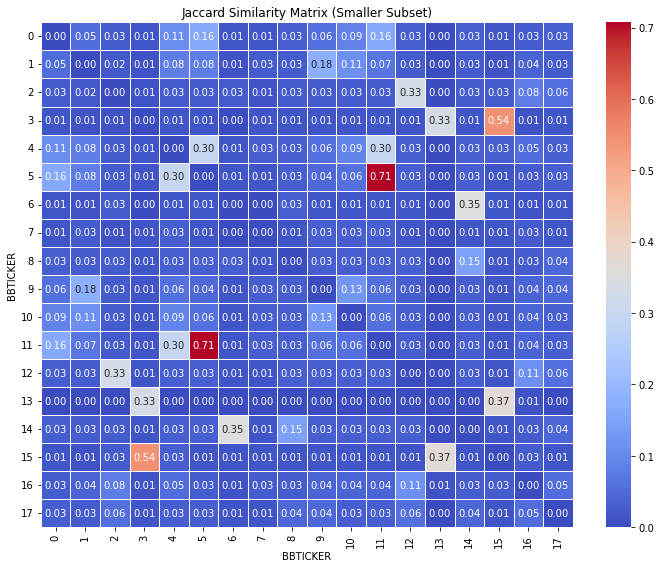

In [21]:
# Create a heatmap of the Jaccard similarity matrix
plt.figure(figsize=(10, 8))
sns.heatmap(jaccard_similarity_matrix, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)
plt.title("Jaccard Similarity Matrix (Smaller Subset)")
plt.xlabel("BBTICKER")
plt.ylabel("BBTICKER")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

### Question 4 & 5

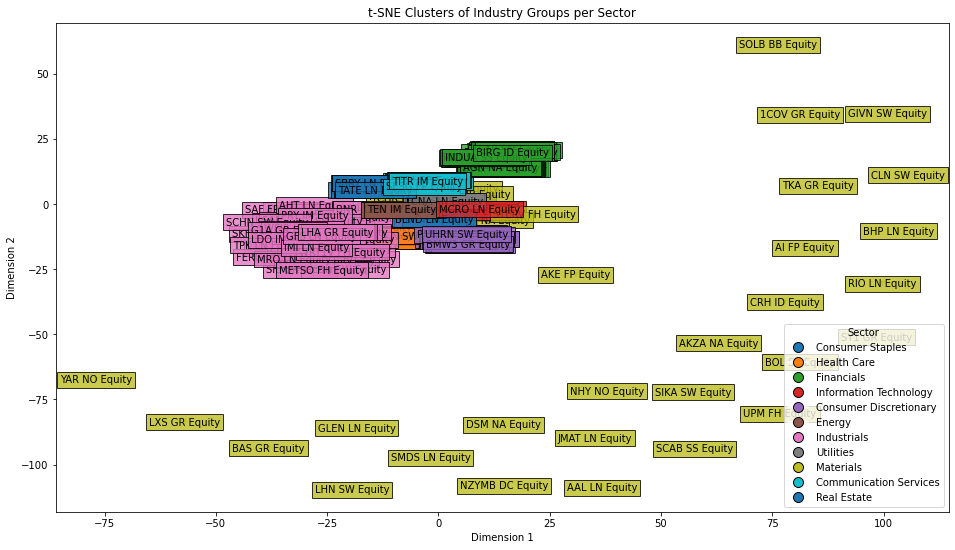

In [22]:
# Select the relevant columns
data_for_tsne = raw_data_cleaned[['BBTICKER', 'GICS_SECTOR_NAME', 'GICS_INDUSTRY_GROUP_NAME']]

# Drop duplicate rows based on BBTICKER column
data_for_tsne_unique = data_for_tsne.drop_duplicates(subset='BBTICKER').reset_index(drop=True)

# Perform one-hot encoding to convert categorical variables into numerical form
data_for_tsne_encoded = pd.get_dummies(data_for_tsne_unique)

# Apply t-SNE to reduce the dimensionality to 2D with a lower perplexity value
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(data_for_tsne_encoded)

# Create a DataFrame with the t-SNE results
tsne_df = pd.DataFrame(tsne_result, columns=['Dimension 1', 'Dimension 2'])
tsne_df['Sector'] = data_for_tsne_unique['GICS_SECTOR_NAME']
tsne_df['GICS_INDUSTRY_GROUP_NAME'] = data_for_tsne_unique['GICS_INDUSTRY_GROUP_NAME']

# Plot the t-SNE clusters using seaborn
plt.figure(figsize=(16, 9))
scatterplot = sns.scatterplot(x='Dimension 1', y='Dimension 2', hue='Sector', style='Sector', data=tsne_df, palette='tab10', alpha=0.8)

# Create custom legend handles with circular markers
unique_sectors = tsne_df['Sector'].unique()
legend_handles = [mlines.Line2D([], [], color='white', marker='o', markersize=10, markerfacecolor=color, markeredgecolor='black', label=sector) for sector, color in zip(unique_sectors, sns.color_palette('tab10', len(unique_sectors)))]

# Add tickers within solid boxes with sector-based facecolor
for x, y, ticker, sector in zip(tsne_df['Dimension 1'], tsne_df['Dimension 2'], data_for_tsne_unique['BBTICKER'], tsne_df['Sector']):
    color = sns.color_palette('tab10', len(tsne_df['Sector'].unique()))[list(tsne_df['Sector'].unique()).index(sector)]
    plt.text(x, y, ticker, ha='center', va='center', bbox=dict(boxstyle='square', facecolor=color, edgecolor='black', alpha=0.8))

plt.title('t-SNE Clusters of Industry Groups per Sector')

# Set the custom legend handles
scatterplot.legend(handles=legend_handles, loc='lower right', title='Sector')
plt.show()

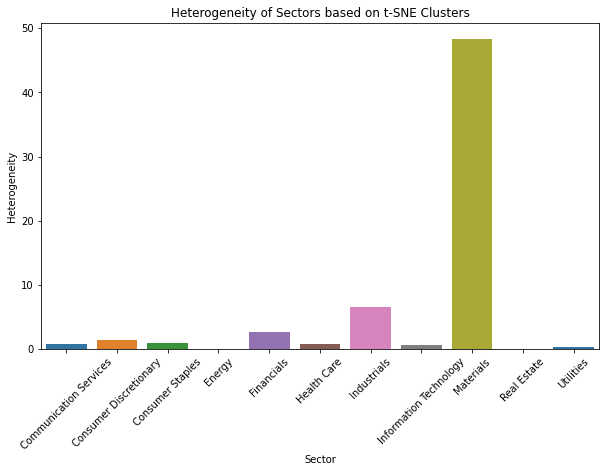

In [23]:
# Calculate the heterogeneity of sectors based on t-SNE clusters
sector_heterogeneity = tsne_df.groupby('Sector').agg({'Dimension 1': 'std', 'Dimension 2': 'std'}).mean(axis=1)

# Plot the heterogeneity of sectors
plt.figure(figsize=(10, 6))
sns.barplot(x=sector_heterogeneity.index, y=sector_heterogeneity.values, palette='tab10')
plt.xticks(rotation=45)
plt.xlabel('Sector')
plt.ylabel('Heterogeneity')
plt.title('Heterogeneity of Sectors based on t-SNE Clusters')
plt.show()

Sectors with higher bars indicate higher heterogeneity, meaning they have more diverse clusters of industry groups.

In [24]:
# Calculate the heterogeneity of sectors based on the clusters formed by industry groups
sector_heterogeneity = tsne_df.groupby('Sector')['Dimension 1', 'Dimension 2'].std().sum(axis=1)

# Sort the sectors based on their heterogeneity scores in descending order
sorted_sectors = sector_heterogeneity.sort_values(ascending=False)

# Print all sector heterogeneity scores
print("Sector Heterogeneity Scores:")
print(sorted_sectors)

# Report the most heterogeneous sector
most_heterogeneous_sector = sorted_sectors.idxmax()
print("\nMost Heterogeneous Sector:")
print(most_heterogeneous_sector)

# Report the most homogeneous sector
most_homogeneous_sector = sorted_sectors.idxmin()
print("\nMost Homogeneous Sector:")
print(most_homogeneous_sector)

Sector Heterogeneity Scores:
Sector
Materials                 96.787134
Industrials               13.103037
Financials                 5.348909
Consumer Discretionary     2.859286
Consumer Staples           1.864718
Health Care                1.662668
Communication Services     1.608282
Information Technology     1.394827
Utilities                  0.758743
Real Estate                0.084694
Energy                     0.000011
dtype: float64

Most Heterogeneous Sector:
Materials

Most Homogeneous Sector:
Energy


### Question 6

In [25]:
# Apply isolation forest algorithm to detect outliers
outlier_detector = IsolationForest(contamination=0.05)  # Adjust the contamination parameter as needed
outlier_detector.fit(tsne_df[['Dimension 1', 'Dimension 2']])

# Predict the outliers
outlier_predictions = outlier_detector.predict(tsne_df[['Dimension 1', 'Dimension 2']])

# Filter the data to include only the outliers
outliers = tsne_df[outlier_predictions == -1]

# Print the outliers' information
print("Outlier Companies:")
print(outliers)

Outlier Companies:
     Dimension 1  Dimension 2     Sector GICS_INDUSTRY_GROUP_NAME
31    -38.123554   -93.768387  Materials                Materials
40     99.740211   -30.586355  Materials                Materials
52    103.288200   -10.370547  Materials                Materials
60     36.672211  -108.775024  Materials                Materials
83    100.976463    34.618969  Materials                Materials
93     57.162415   -72.286682  Materials                Materials
94    -19.401804  -109.564049  Materials                Materials
137    62.972298   -53.359516  Materials                Materials
141    76.705780   -80.506172  Materials                Materials
167    98.409782   -51.133011  Materials                Materials
177    14.664721  -108.034691  Materials                Materials
284   -76.864578   -67.360298  Materials                Materials
285    81.143463    34.334175  Materials                Materials
291    76.291512    61.081768  Materials                M

### Question 7

### Another perspective to look at tSNE result in Q4&5

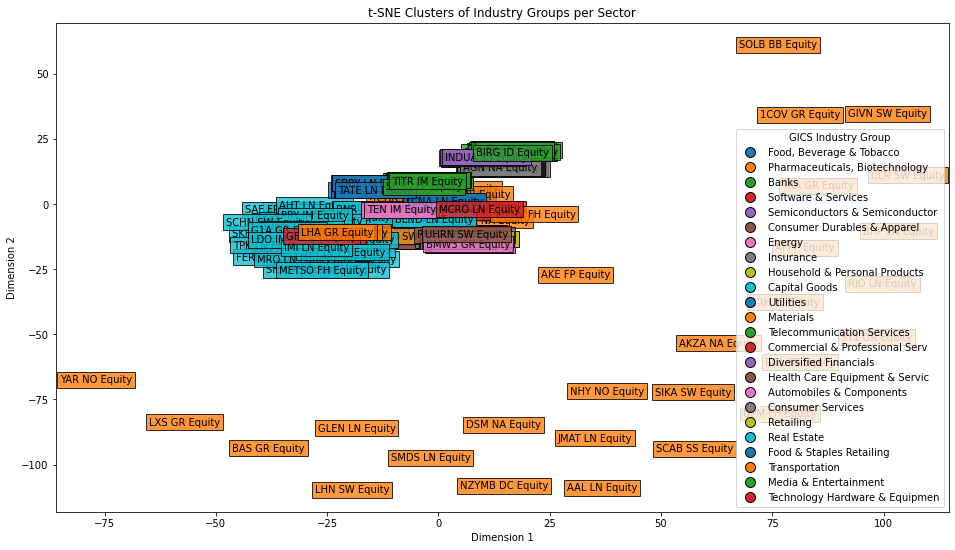

In [26]:
# Plot the t-SNE clusters using seaborn with different colors for each 'GICS_INDUSTRY_GROUP_NAME'
plt.figure(figsize=(16, 9))
scatterplot = sns.scatterplot(x='Dimension 1', y='Dimension 2', hue='GICS_INDUSTRY_GROUP_NAME', style='Sector', data=tsne_df, palette='tab10', alpha=0.8)

# Create custom legend handles with circular markers
unique_industries = tsne_df['GICS_INDUSTRY_GROUP_NAME'].unique()
legend_handles = [mlines.Line2D([], [], color='white', marker='o', markersize=10, markerfacecolor=color, markeredgecolor='black', label=industry) for industry, color in zip(unique_industries, sns.color_palette('tab10', len(unique_industries)))]

# Add tickers within solid boxes with industry-based facecolor
for x, y, ticker, industry in zip(tsne_df['Dimension 1'], tsne_df['Dimension 2'], data_for_tsne_unique['BBTICKER'], tsne_df['GICS_INDUSTRY_GROUP_NAME']):
    color = sns.color_palette('tab10', len(tsne_df['GICS_INDUSTRY_GROUP_NAME'].unique()))[list(tsne_df['GICS_INDUSTRY_GROUP_NAME'].unique()).index(industry)]
    plt.text(x, y, ticker, ha='center', va='center', bbox=dict(boxstyle='square', facecolor=color, edgecolor='black', alpha=0.8))

plt.title('t-SNE Clusters of Industry Groups per Sector')

# Set the custom legend handles
scatterplot.legend(handles=legend_handles, loc='lower right', title='GICS Industry Group')
plt.show()

### In the case of dimension reduction, what about using PCA?

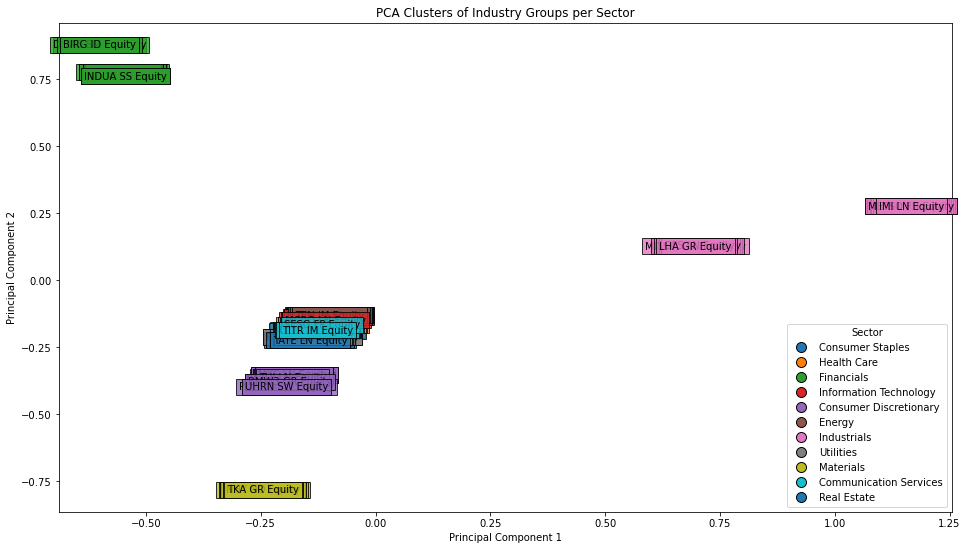

In [27]:
# Select the relevant columns
data_for_pca = raw_data_cleaned[['BBTICKER', 'GICS_SECTOR_NAME', 'GICS_INDUSTRY_GROUP_NAME']]

# Drop duplicate rows based on BBTICKER column
data_for_pca_unique = data_for_pca.drop_duplicates(subset='BBTICKER').reset_index(drop=True)

# Perform one-hot encoding to convert categorical variables into numerical form
data_for_pca_encoded = pd.get_dummies(data_for_pca_unique)

# Apply PCA to reduce the dimensionality to 2D
pca = PCA(n_components=2, random_state=42)
pca_result = pca.fit_transform(data_for_pca_encoded)

# Create a DataFrame with the PCA results
pca_df = pd.DataFrame(pca_result, columns=['Principal Component 1', 'Principal Component 2'])
pca_df['Sector'] = data_for_pca_unique['GICS_SECTOR_NAME']
pca_df['GICS_INDUSTRY_GROUP_NAME'] = data_for_pca_unique['GICS_INDUSTRY_GROUP_NAME']

# Plot the PCA clusters using seaborn
plt.figure(figsize=(16, 9))
scatterplot = sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue='Sector', style='Sector', data=pca_df, palette='tab10', alpha=0.8)

# Create custom legend handles with circular markers
unique_sectors = pca_df['Sector'].unique()
legend_handles = [mlines.Line2D([], [], color='white', marker='o', markersize=10, markerfacecolor=color, markeredgecolor='black', label=sector) for sector, color in zip(unique_sectors, sns.color_palette('tab10', len(unique_sectors)))]

# Add tickers within solid boxes with sector-based facecolor
for x, y, ticker, sector in zip(pca_df['Principal Component 1'], pca_df['Principal Component 2'], data_for_pca_unique['BBTICKER'], pca_df['Sector']):
    color = sns.color_palette('tab10', len(pca_df['Sector'].unique()))[list(pca_df['Sector'].unique()).index(sector)]
    plt.text(x, y, ticker, ha='center', va='center', bbox=dict(boxstyle='square', facecolor=color, edgecolor='black', alpha=0.8))

plt.title('PCA Clusters of Industry Groups per Sector')

# Set the custom legend handles
scatterplot.legend(handles=legend_handles, loc='lower right', title='Sector')
plt.show()